In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("/kaggle/input/tbm-anfis-pnn-ica/TBM_ANFIS-PNN-ICA.csv", index_col=0)
dataset.head(5)

,RQD (%),UCS (MPa),RMR,BTS (MPa),TF (KN),RPM (rev/min),PR (m/h)
1,65.00,105.0,73.5,7.56,195.22,7.53,2.51
2,61.25,130.0,65.0,7.56,248.92,7.30,2.22
3,92.50,150.0,65.0,12.56,280.05,5.98,1.99
4,57.50,85.0,56.0,7.56,266.72,8.28,2.96
5,57.50,90.0,65.0,7.56,295.97,10.96,2.85


In [3]:
data = np.array(dataset.iloc[:,:-1])
target = np.array(dataset.iloc[:,-1]).reshape(-1,1)
print(data.shape)
print(target.shape)

(209, 6)
(209, 1)


In [4]:
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.3,random_state=7)

In [5]:
!pip install flaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 9.5 MB/s eta 0:00:00


In [6]:
from flaml import AutoML
automl = AutoML()

2024-03-17 02:28:53,560	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-17 02:28:54,463	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [7]:
automl.fit(X_train, y_train, task="regression",metric='r2',time_budget=60)

[flaml.automl.logger: 03-17 02:28:57] {1680} INFO - task = regression
[flaml.automl.logger: 03-17 02:28:57] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 03-17 02:28:57] {1789} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 03-17 02:28:57] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 03-17 02:28:57] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 03-17 02:28:57] {2345} INFO - Estimated sufficient time budget=718s. Estimated necessary time budget=6s.
[flaml.automl.logger: 03-17 02:28:57] {2392} INFO -  at 0.3s,	estimator lgbm's best error=0.5261,	best estimator lgbm's best error=0.5261
[flaml.automl.logger: 03-17 02:28:57] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 03-17 02:28:57] {2392} INFO -  at 0.3s,	estimator lgbm's best error=0.5261,	best estimator lgbm's best error=0.5261
[flaml.automl.logger: 03-17 02:28:57] {221

In [8]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best log_loss on validation data: {0:.4g}'.format(automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: extra_tree
Best hyperparmeter config: {'n_estimators': 23, 'max_features': 0.5688314603754663, 'max_leaves': 36}
Best log_loss on validation data: 0.07491
Training duration of best run: 0.04369 s


In [9]:
model_x = automl.model
pred = model_x.predict(X_test)
pred = pred.reshape(-1,1)

for (p,y) in zip(pred,y_test):
    print(f'Prediction of PR "{p[0]:0.5}" & actual PR "{y[0]}"')

Prediction of PR "1.9733" & actual PR "2.01"
Prediction of PR "2.5752" & actual PR "2.67"
Prediction of PR "2.0932" & actual PR "2.07"
Prediction of PR "3.2436" & actual PR "3.13"
Prediction of PR "1.8269" & actual PR "1.76"
Prediction of PR "1.8682" & actual PR "1.71"
Prediction of PR "2.8751" & actual PR "2.72"
Prediction of PR "1.9994" & actual PR "1.99"
Prediction of PR "1.9568" & actual PR "1.97"
Prediction of PR "2.4639" & actual PR "2.3"
Prediction of PR "1.7297" & actual PR "1.78"
Prediction of PR "2.0052" & actual PR "2.02"
Prediction of PR "2.5039" & actual PR "2.33"
Prediction of PR "2.3974" & actual PR "2.27"
Prediction of PR "2.5313" & actual PR "2.28"
Prediction of PR "1.3512" & actual PR "1.34"
Prediction of PR "3.0522" & actual PR "3.36"
Prediction of PR "1.4877" & actual PR "1.73"
Prediction of PR "3.2775" & actual PR "3.04"
Prediction of PR "3.1945" & actual PR "3.24"
Prediction of PR "2.6654" & actual PR "2.66"
Prediction of PR "3.1021" & actual PR "3.23"
Prediction 

In [10]:
print(f'COD(R2) : {model_x.score(X_test,y_test):0.5}')

COD(R2) : 0.94904


Text(0, 0.5, 'True PR')

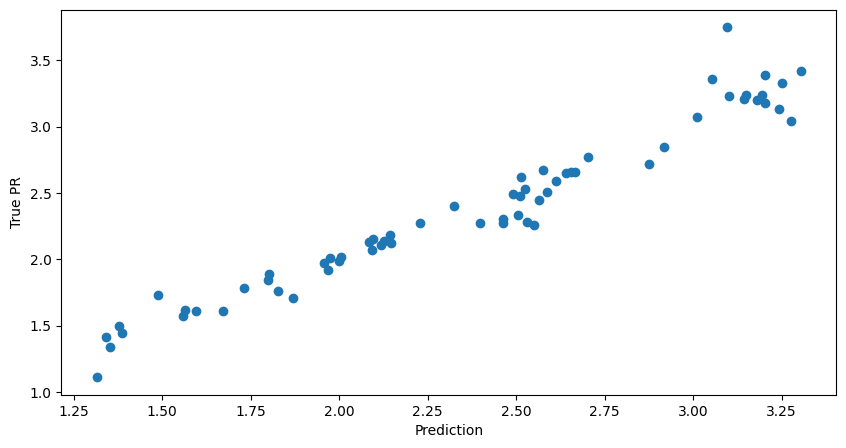

In [11]:
plt.figure(figsize=(10,5))
plt.plot(pred,y_test,'o')
plt.xlabel('Prediction')
plt.ylabel('True PR')

# Model 1 - RandomForestRegressor

In [12]:
from sklearn.ensemble import RandomForestRegressor

model_1 = RandomForestRegressor(n_estimators=50, criterion='squared_error', max_depth=4, max_features=1/3, max_samples=1.0, bootstrap=True, oob_score=True, random_state=100).fit(X_train,y_train)

/tmp/ipykernel_18/2630313129.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_1 = RandomForestRegressor(n_estimators=50, criterion='squared_error', max_depth=4, max_features=1/3, max_samples=1.0, bootstrap=True, oob_score=True, random_state=100).fit(X_train,y_train)


In [13]:
pred = model_1.predict(X_test)
pred = pred.reshape(-1,1)

for (p,y) in zip(pred,y_test):
    print(f'Prediction of PR "{p[0]:0.5}" & actual PR "{y[0]}"')

Prediction of PR "2.0104" & actual PR "2.01"
Prediction of PR "2.5736" & actual PR "2.67"
Prediction of PR "2.0702" & actual PR "2.07"
Prediction of PR "3.1975" & actual PR "3.13"
Prediction of PR "1.7739" & actual PR "1.76"
Prediction of PR "1.8626" & actual PR "1.71"
Prediction of PR "2.8453" & actual PR "2.72"
Prediction of PR "2.0077" & actual PR "1.99"
Prediction of PR "1.957" & actual PR "1.97"
Prediction of PR "2.4761" & actual PR "2.3"
Prediction of PR "1.7458" & actual PR "1.78"
Prediction of PR "1.9891" & actual PR "2.02"
Prediction of PR "2.5196" & actual PR "2.33"
Prediction of PR "2.4473" & actual PR "2.27"
Prediction of PR "2.5467" & actual PR "2.28"
Prediction of PR "1.3864" & actual PR "1.34"
Prediction of PR "3.0633" & actual PR "3.36"
Prediction of PR "1.5367" & actual PR "1.73"
Prediction of PR "3.287" & actual PR "3.04"
Prediction of PR "3.1644" & actual PR "3.24"
Prediction of PR "2.8292" & actual PR "2.66"
Prediction of PR "3.1025" & actual PR "3.23"
Prediction of

In [14]:
print(f'COD(R2) : {model_1.score(X_test,y_test):0.5}')

COD(R2) : 0.94508


# Model 2 - XGBOOST

In [15]:
from xgboost import XGBRegressor

model_2 = XGBRegressor().fit(X_train, y_train)

In [16]:
pred = model_2.predict(X_test)
pred = pred.reshape(-1,1)

for (p,y) in zip(pred,y_test):
    print(f'Prediction of PR "{p[0]:0.5}" & actual PR "{y[0]}"')

Prediction of PR "1.9623" & actual PR "2.01"
Prediction of PR "2.6079" & actual PR "2.67"
Prediction of PR "2.0637" & actual PR "2.07"
Prediction of PR "3.2155" & actual PR "3.13"
Prediction of PR "1.7789" & actual PR "1.76"
Prediction of PR "1.9264" & actual PR "1.71"
Prediction of PR "2.7577" & actual PR "2.72"
Prediction of PR "1.943" & actual PR "1.99"
Prediction of PR "1.8425" & actual PR "1.97"
Prediction of PR "2.4119" & actual PR "2.3"
Prediction of PR "1.6794" & actual PR "1.78"
Prediction of PR "2.022" & actual PR "2.02"
Prediction of PR "2.3868" & actual PR "2.33"
Prediction of PR "2.6229" & actual PR "2.27"
Prediction of PR "2.6438" & actual PR "2.28"
Prediction of PR "1.3939" & actual PR "1.34"
Prediction of PR "3.0247" & actual PR "3.36"
Prediction of PR "1.5131" & actual PR "1.73"
Prediction of PR "3.3947" & actual PR "3.04"
Prediction of PR "3.2119" & actual PR "3.24"
Prediction of PR "2.499" & actual PR "2.66"
Prediction of PR "2.9864" & actual PR "3.23"
Prediction of 

In [17]:
print(f'COD(R2) : {model_2.score(X_test,y_test):0.5}')

COD(R2) : 0.93499


# Model 3 - Naive Bayes

In [18]:
from sklearn.linear_model import BayesianRidge

model_3 = BayesianRidge().fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
pred = model_3.predict(X_test)
pred = pred.reshape(-1,1)

for (p,y) in zip(pred,y_test):
    print(f'Prediction of PR "{p[0]:0.5}" & actual PR "{y[0]}"')

Prediction of PR "1.8947" & actual PR "2.01"
Prediction of PR "2.6259" & actual PR "2.67"
Prediction of PR "2.0582" & actual PR "2.07"
Prediction of PR "3.3167" & actual PR "3.13"
Prediction of PR "1.6709" & actual PR "1.76"
Prediction of PR "1.7533" & actual PR "1.71"
Prediction of PR "3.0096" & actual PR "2.72"
Prediction of PR "2.0695" & actual PR "1.99"
Prediction of PR "1.8861" & actual PR "1.97"
Prediction of PR "2.4224" & actual PR "2.3"
Prediction of PR "1.7107" & actual PR "1.78"
Prediction of PR "1.9716" & actual PR "2.02"
Prediction of PR "2.5958" & actual PR "2.33"
Prediction of PR "2.4513" & actual PR "2.27"
Prediction of PR "2.4621" & actual PR "2.28"
Prediction of PR "1.5404" & actual PR "1.34"
Prediction of PR "3.1435" & actual PR "3.36"
Prediction of PR "1.5752" & actual PR "1.73"
Prediction of PR "3.1482" & actual PR "3.04"
Prediction of PR "3.289" & actual PR "3.24"
Prediction of PR "2.8018" & actual PR "2.66"
Prediction of PR "3.2719" & actual PR "3.23"
Prediction o

In [20]:
print(f'COD(R2) : {model_3.score(X_test,y_test):0.5}')

COD(R2) : 0.93641
